## This is for Data Science class EDA

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
import nltk

In [64]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from gensim import corpora

In [4]:
df = pd.read_csv(r'/Users/manas.vani/Downloads/kaggle/archive/Reviews.csv')

In [5]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [ ]:
# Forgot to check for null values in this case!!!! 

In [6]:
df.ProductId.nunique()

74258

In [7]:
product_id_counts = df['ProductId'].value_counts()

# Get the top 5 most frequent productIDs
top_5_product_ids = product_id_counts.head(25)

print("Top 5 most frequent productIDs:")
print(top_5_product_ids)


Top 5 most frequent productIDs:
B007JFMH8M    913
B0026RQTGE    632
B002QWHJOU    632
B002QWP89S    632
B002QWP8H0    632
B003B3OOPA    623
B001EO5Q64    567
B000VK8AVK    564
B0026KNQSA    564
B007M83302    564
B001RVFEP2    564
B001RVFERK    564
B007M832YY    564
B0026KPDG8    564
B006HYLW32    564
B0013NUGDE    564
B000KV7ZGQ    556
B000KV61FC    556
B0013A0QXC    542
B005K4Q37A    542
B005K4Q4LK    542
B005K4Q34S    542
B005K4Q1YA    542
B000NMJWZO    542
B000UBD88A    542
Name: ProductId, dtype: int64


In [8]:
dog_food = ['B002QWP89S', 'B002QWHJOU', 'B002QWP8H0']

dog_food_df = df[df['ProductId'].isin(dog_food)]

print(dog_food_df)


            Id   ProductId          UserId             ProfileName  \
20982    20983  B002QWP89S  A21U4DR8M6I9QN  K. M Merrill "justine"   
20983    20984  B002QWP89S  A17TDUBB4Z1PEC             jaded_green   
20984    20985  B002QWP89S   ABQH3WAWMSMBH             tenisbrat87   
20985    20986  B002QWP89S   AVTY5M74VA1BJ              tarotqueen   
20986    20987  B002QWP89S  A13TNN54ZEAUB1                 dcz2221   
...        ...         ...             ...                     ...   
356130  356131  B002QWP8H0  A3OIE7IE9LTPJG                GatorMan   
356131  356132  B002QWP8H0  A1HZIWB1RGW7RM           Danny Knowles   
356132  356133  B002QWP8H0  A1Q5SEO5O6E0L4                 brendab   
356133  356134  B002QWP8H0   AFMF7YL0PKFIM                     Jan   
356134  356135  B002QWP8H0  A3QXDQF5L6XOTS                HalfGeek   

        HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
20982                      1                       1      5  1318896000   
20983    

In [9]:
dog_food_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
20982,20983,B002QWP89S,A21U4DR8M6I9QN,"K. M Merrill ""justine""",1,1,5,1318896000,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...
20983,20984,B002QWP89S,A17TDUBB4Z1PEC,jaded_green,1,1,5,1318550400,genuine Greenies best price,"These are genuine Greenies product, not a knoc..."
20984,20985,B002QWP89S,ABQH3WAWMSMBH,tenisbrat87,1,1,5,1317168000,Perfect for our little doggies,"Our dogs love Greenies, but of course, which d..."
20985,20986,B002QWP89S,AVTY5M74VA1BJ,tarotqueen,1,1,5,1316822400,dogs love greenies,"What can I say, dogs love greenies. They begg ..."
20986,20987,B002QWP89S,A13TNN54ZEAUB1,dcz2221,1,1,5,1316736000,Greenies review,This review is for a box of Greenies Lite for ...


In [10]:
dog_food_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
20982,20983,B002QWP89S,A21U4DR8M6I9QN,"K. M Merrill ""justine""",1,1,5,1318896000,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...
20983,20984,B002QWP89S,A17TDUBB4Z1PEC,jaded_green,1,1,5,1318550400,genuine Greenies best price,"These are genuine Greenies product, not a knoc..."
20984,20985,B002QWP89S,ABQH3WAWMSMBH,tenisbrat87,1,1,5,1317168000,Perfect for our little doggies,"Our dogs love Greenies, but of course, which d..."
20985,20986,B002QWP89S,AVTY5M74VA1BJ,tarotqueen,1,1,5,1316822400,dogs love greenies,"What can I say, dogs love greenies. They begg ..."
20986,20987,B002QWP89S,A13TNN54ZEAUB1,dcz2221,1,1,5,1316736000,Greenies review,This review is for a box of Greenies Lite for ...


In [11]:
dog_food_df.shape

(1896, 10)

In [12]:
dog_food_df['Time'] = pd.to_datetime(dog_food_df['Time'], unit='s')
dog_food_df['Time'] = dog_food_df['Time'].dt.strftime('%Y-%m-%d %H:%M:%S')

C:\Users\manas.vani\AppData\Local\Temp\ipykernel_5648\3726728536.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dog_food_df['Time'] = pd.to_datetime(dog_food_df['Time'], unit='s')
C:\Users\manas.vani\AppData\Local\Temp\ipykernel_5648\3726728536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dog_food_df['Time'] = dog_food_df['Time'].dt.strftime('%Y-%m-%d %H:%M:%S')


In [13]:
dog_food_df.Time.min()

'2007-03-28 00:00:00'

In [14]:
dog_food_df.Time.max()

'2012-10-25 00:00:00'

In [15]:
dog_food_df.Text.iloc[1]

'These are genuine Greenies product, not a knockoff.  My dogs love them!  It is their favorite treat.  I have 2 small dogs, both under 10 lbs. and the Teenie size is perfect for them.  I paid $22.37 for this 96-pack and it is by far the best price I have found anywhere.  I wish these were part of the Subscribe & Save program.'

<Axes: xlabel='Score', ylabel='HelpfulnessNumerator'>

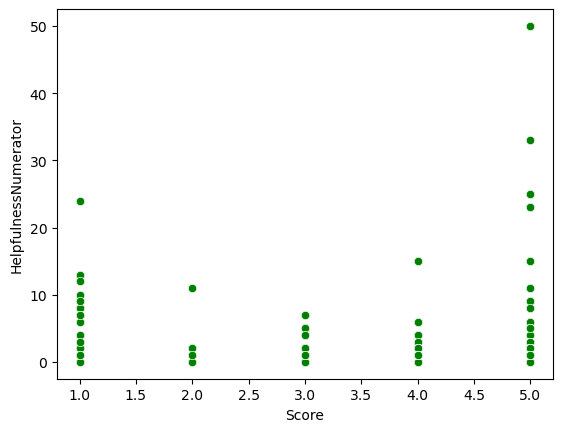

In [16]:
sns.scatterplot(data=dog_food_df, y='HelpfulnessNumerator', x='Score', color="green") # Add this in the assumptions 

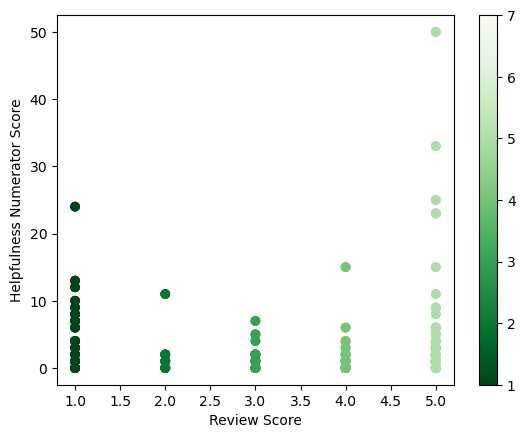

In [17]:
# Create scatter plot with green colormap
fig, ax = plt.subplots()
scatter = ax.scatter(x=dog_food_df['Score'], y=dog_food_df['HelpfulnessNumerator'], c=dog_food_df['Score'], cmap='Greens_r', vmin=1, vmax=7)

# Set colorbar
colorbar = fig.colorbar(scatter)

# Set x and y axis labels
ax.set_xlabel('Review Score')
ax.set_ylabel('Helpfulness Numerator Score')

# Show plot
plt.show()


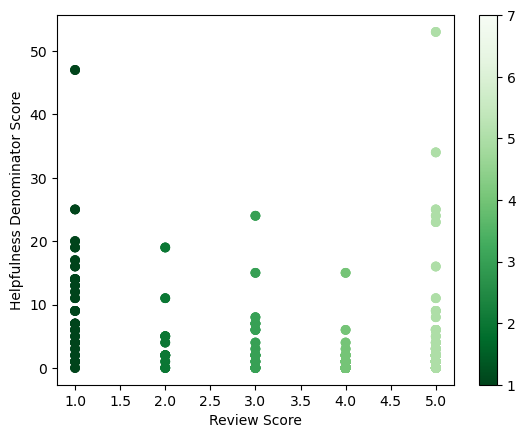

In [18]:
# Create scatter plot with green colormap
fig, ax = plt.subplots()
scatter = ax.scatter(x=dog_food_df['Score'], y=dog_food_df['HelpfulnessDenominator'], c=dog_food_df['Score'], cmap='Greens_r', vmin=1, vmax=7)

# Set colorbar
colorbar = fig.colorbar(scatter)

# Set x and y axis labels
ax.set_xlabel('Review Score')
ax.set_ylabel('Helpfulness Denominator Score')

# Show plot
plt.show()


In [19]:
dog_food_df.keys()

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [20]:
# The steps I need to take in this 
# 1. Clean the text, 
# 2. Tokenization 
# 3. Stopwords removal 
# 4. Lemmatization 
# 5. 
# 6. 

In [21]:
nltk.download('english')

[nltk_data] Error loading english: Package 'english' not found in
[nltk_data]     index


False

In [22]:
percent_plot = pd.DataFrame({"Total":dog_food_df["Score"].value_counts()})
percent_plot.reset_index(inplace = True)
percent_plot.rename(columns={"index":"Rating"},inplace=True)

In [23]:
percent_plot

,Rating,Total
0,5,1494
1,4,222
2,1,81
3,3,63
4,2,36


In [24]:
# Cleaning the text 

In [25]:
import re

def clean(text):

    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

dog_food_df['Cleaned Text'] = df['Text'].apply(clean)
dog_food_df.head()

C:\Users\manas.vani\AppData\Local\Temp\ipykernel_5648\1825532348.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dog_food_df['Cleaned Text'] = df['Text'].apply(clean)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Cleaned Text
20982,20983,B002QWP89S,A21U4DR8M6I9QN,"K. M Merrill ""justine""",1,1,5,2011-10-18 00:00:00,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...,my year old sheltie has chronic brochotitis be...
20983,20984,B002QWP89S,A17TDUBB4Z1PEC,jaded_green,1,1,5,2011-10-14 00:00:00,genuine Greenies best price,"These are genuine Greenies product, not a knoc...",These are genuine Greenies product not a knock...
20984,20985,B002QWP89S,ABQH3WAWMSMBH,tenisbrat87,1,1,5,2011-09-28 00:00:00,Perfect for our little doggies,"Our dogs love Greenies, but of course, which d...",Our dogs love Greenies but of course which dog...
20985,20986,B002QWP89S,AVTY5M74VA1BJ,tarotqueen,1,1,5,2011-09-24 00:00:00,dogs love greenies,"What can I say, dogs love greenies. They begg ...",What can I say dogs love greenies They begg fo...
20986,20987,B002QWP89S,A13TNN54ZEAUB1,dcz2221,1,1,5,2011-09-23 00:00:00,Greenies review,This review is for a box of Greenies Lite for ...,This review is for a box of Greenies Lite for ...


In [26]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manas.vani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manas.vani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\manas.vani\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [27]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\manas.vani\AppData\Roaming\nltk_data...


[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\manas.vani\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [28]:
dog_food_df['tagged'] = dog_food_df['Cleaned Text'].apply(token_stop_pos)

C:\Users\manas.vani\AppData\Local\Temp\ipykernel_5648\1741634639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dog_food_df['tagged'] = dog_food_df['Cleaned Text'].apply(token_stop_pos)


In [29]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew


In [30]:
dog_food_df['Lemma'] = dog_food_df['tagged'].apply(lemmatize)

C:\Users\manas.vani\AppData\Local\Temp\ipykernel_5648\3990359172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dog_food_df['Lemma'] = dog_food_df['tagged'].apply(lemmatize)


In [31]:
dog_food_df[['Cleaned Text', 'Lemma']]

,Cleaned Text,Lemma
20982,my year old sheltie has chronic brochotitis be...,year old sheltie chronic brochotitis med thr...
20983,These are genuine Greenies product not a knock...,genuine Greenies product knockoff dog love f...
20984,Our dogs love Greenies but of course which dog...,dog love Greenies course doggies buy dashchu...
20985,What can I say dogs love greenies They begg fo...,say dog love greenies begg time always sit c...
20986,This review is for a box of Greenies Lite for ...,review box Greenies Lite dog package come qu...
...,...,...
356130,Make sure you have a small dog Big Dogs might ...,Make sure small dog Big Dogs might choke get...
356131,These are the best things since sliced bread I...,best thing since slice bread give dog treat ...
356132,My dog loves these I received a sample at the ...,dog love receive sample vet office get puppy...
356133,Oh my gosh we cannot be without Greenies at ou...,Oh gosh without Greenies house unhappy doggi...


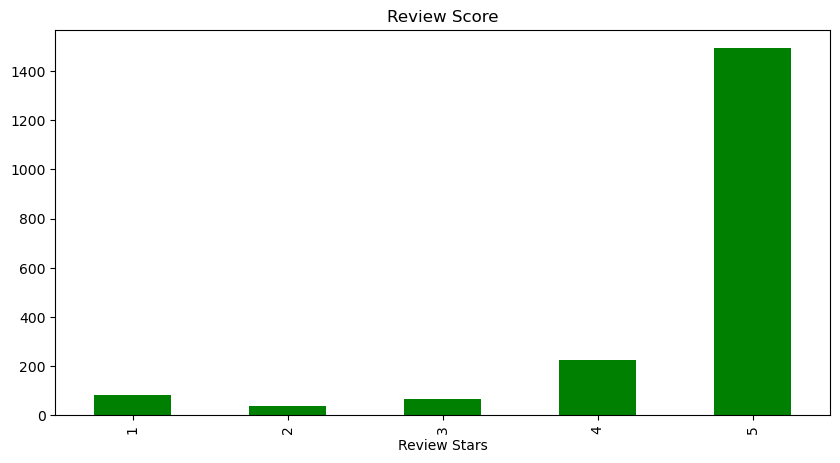

In [32]:
ax = dog_food_df['Score'].value_counts().sort_index()\
    .plot(kind='bar', 
        title = 'Review Score',
        figsize=(10,5), color='green')


ax.set_xlabel('Review Stars')
plt.show()

In [33]:
dog_food_df.keys()

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'Cleaned Text', 'tagged', 'Lemma'],
      dtype='object')

In [34]:
dog_food_df.HelpfulnessNumerator.iloc[100]

50

In [35]:
dog_food_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1896 entries, 20982 to 356134
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      1896 non-null   int64 
 1   ProductId               1896 non-null   object
 2   UserId                  1896 non-null   object
 3   ProfileName             1896 non-null   object
 4   HelpfulnessNumerator    1896 non-null   int64 
 5   HelpfulnessDenominator  1896 non-null   int64 
 6   Score                   1896 non-null   int64 
 7   Time                    1896 non-null   object
 8   Summary                 1896 non-null   object
 9   Text                    1896 non-null   object
 10  Cleaned Text            1896 non-null   object
 11  tagged                  1896 non-null   object
 12  Lemma                   1896 non-null   object
dtypes: int64(4), object(9)
memory usage: 207.4+ KB


In [36]:
dog_food_df.keys()

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'Cleaned Text', 'tagged', 'Lemma'],
      dtype='object')

In [37]:
#Imbalanced dataset, will need to see how this will affect the results 

In [38]:
dog_food_df['Score'].value_counts().sort_index()

1      81
2      36
3      63
4     222
5    1494
Name: Score, dtype: int64

In [39]:
# Worcloud part 

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()


In [40]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


In [41]:
low_rated_dog_food = dog_food_df[dog_food_df['Score'] == 1] 

In [42]:
low_rated_dog_food

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Cleaned Text,tagged,Lemma
21014,21015,B002QWP89S,A2QMK145N3F9M,anzi,3,4,1,2012-10-08 00:00:00,Check Contents First,"Half way through the supply, I noticed that th...",Half way through the supply I noticed that the...,"[(Half, None), (way, n), (supply, n), (noticed...",Half way supply notice tiny white worm bore ...
21019,21020,B002QWP89S,A2DBNDAIHM8XXL,"Dennis Park ""Dennis""",0,0,1,2012-10-23 00:00:00,very dangerous product for dogs,i bought this for my dog - he loved it. howev...,i bought this for my dog he loved it however i...,"[(bought, v), (dog, n), (loved, v), (however, ...",buy dog love however notice stop pooping com...
21306,21307,B002QWP89S,AYKK46NTS0MUZ,MB the GymRat,13,17,1,2011-09-15 00:00:00,Greenies Lite - Not for dogs who had the taste...,My little dog who's rather picky about his tre...,My little dog who s rather picky about his tre...,"[(little, a), (dog, n), (rather, r), (picky, a...",little dog rather picky treat absolutely lov...
21512,21513,B002QWP89S,A3K185BXWHVS6X,A. Lu,10,16,1,2011-07-12 00:00:00,Bad for My Dog,My dog was on a bland diet (boiled chicken & r...,My dog was on a bland diet boiled chicken rice...,"[(dog, n), (bland, n), (diet, n), (boiled, v),...",dog bland diet boil chicken rice poop usuall...
21532,21533,B002QWP89S,A2F2UOAIUB1V8B,TwoPiecesOfshihTzu,12,20,1,2011-12-24 00:00:00,WORMS IN GREENIES?????,This is my second box of greenies that I have ...,This is my second box of greenies that I have ...,"[(second, a), (box, n), (greenies, n), (quite,...",second box greenies quite pleased today pull...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
356085,356086,B002QWP8H0,A3P8WFZ3ZPA0AX,brittany,0,4,1,2012-09-20 00:00:00,Find another treat,I have an almost two year old lab mix named Ar...,I have an almost two year old lab mix named Ar...,"[(almost, r), (two, None), (year, n), (old, a)...",almost two year old lab mix name Ares willin...
356087,356088,B002QWP8H0,A2W94QQDJY47R7,lilyponds,1,6,1,2011-06-27 00:00:00,Greenies Made My Dog SICK,Do not buy these for your dog! I made the mist...,Do not buy these for your dog I made the mista...,"[(buy, v), (dog, n), (made, v), (mistake, n), ...",buy dog make mistake research Greenies Denta...
356089,356090,B002QWP8H0,A3HHLRVCGQW0L7,Julia Kuiper,1,7,1,2011-04-18 00:00:00,Didn't receive what I ordered,I ordered the Teenie pack of Greenies that was...,I ordered the Teenie pack of Greenies that was...,"[(ordered, v), (Teenie, n), (pack, n), (Greeni...",order Teenie pack Greenies suppose come teen...
356090,356091,B002QWP8H0,A3KDKU5A4MS3K3,A. Prouty,3,11,1,2012-06-20 00:00:00,PLEASE RESEARCH BEFORE GIVING TO YOUR DOG!,Read the stories online....dogs have died from...,Read the stories online dogs have died from Gr...,"[(Read, v), (stories, n), (online, v), (dogs, ...",Read story online dog die Greenies give lb p...


In [43]:
high_rated_dog_food = dog_food_df[(dog_food_df['Score'] == 5) | (dog_food_df['Score'] == 4)]


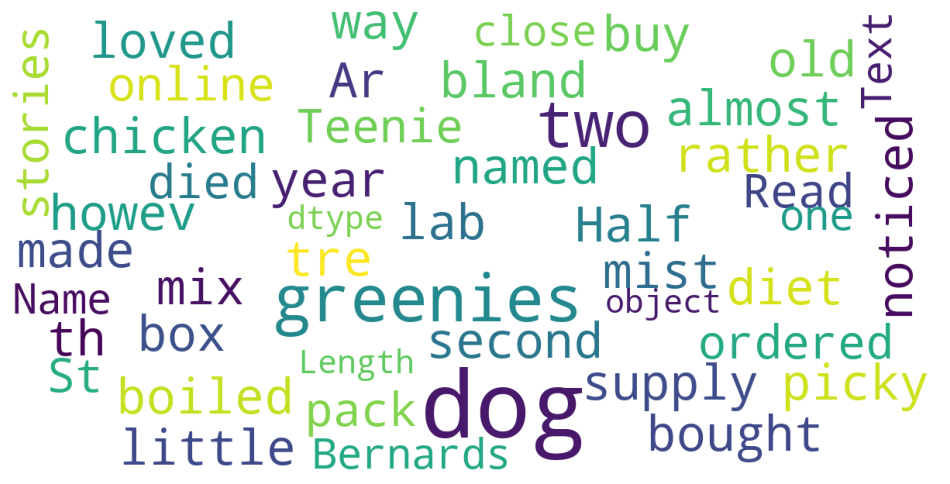

In [44]:
show_wordcloud(low_rated_dog_food['Text'])

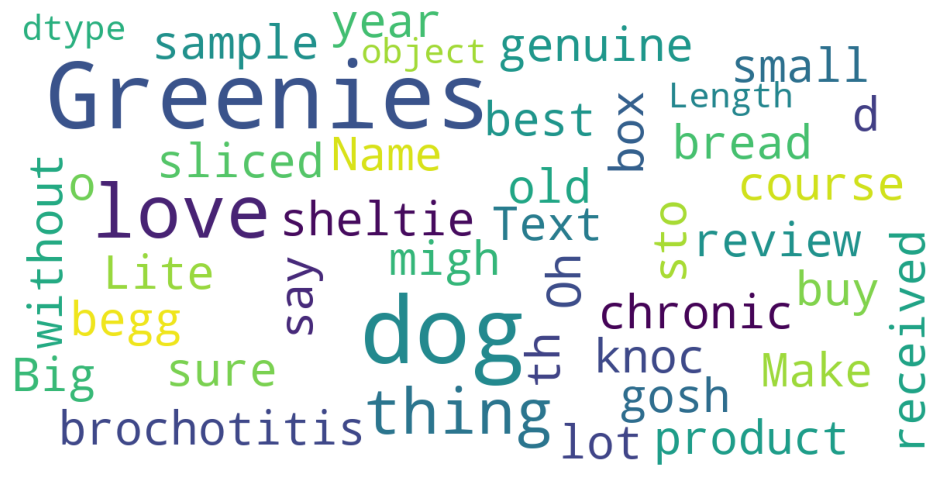

In [45]:
show_wordcloud(high_rated_dog_food['Text'])

In [46]:
from nltk import ngrams, FreqDist
all_counts = dict()
for size in 2, 3, 4, 5:
    all_counts[size] = FreqDist(ngrams(dog_food_df['Text'], size))

In [47]:
all_counts[3].most_common(5)

[(('my 12 year old sheltie has chronic brochotitis, been on meds for three years, these help with the coughing fits at night. so I like them!!!<br /> one bite and both my dogs are addicted!!! be warned!!! 7 pm both shelties are on my lap howling for the drug fix! I am a dog trainer and have never seen  anything like it....<br /><br />three weeks later,, the beloved sheltie got a bowel blockage from these, use with caution.<br />if the cat gets too many she has the runs....<br />sheltie did better when i upped her thryoid meds, and gave her doggie asthma meds.<br />so it worked better for the 18 year old cat, who also has asthma.',
   'These are genuine Greenies product, not a knockoff.  My dogs love them!  It is their favorite treat.  I have 2 small dogs, both under 10 lbs. and the Teenie size is perfect for them.  I paid $22.37 for this 96-pack and it is by far the best price I have found anywhere.  I wish these were part of the Subscribe & Save program.',
   "Our dogs love Greenies, 

In [48]:
from nltk import ngrams, FreqDist
all_counts = dict()
for size in 2, 3, 4, 5:
    all_counts[size] = FreqDist(ngrams(low_rated_dog_food['Text'], size))

In [49]:
all_counts[3].most_common(5)

[(('Half way through the supply, I noticed that there were tiny white worms boring through a greenie so I checked the remaining greenies and they also had worms.  Please empty the contents of the box and check the greenies when you receive your order before giving them to your dog.  This may have been an isolated incident but it would only take a few minutes to check the contents for freshness.',
   "i bought this for my dog - he loved it.  however, i noticed that he stopped pooping and came to realize (after googling) that it caused him to be constipated.  His stomach was very bloated and I could feel that his colon was obstructed by something -- a piece of undigested greenies treat.  I gave him all some olive oil and mineral oil and massaged his colon and eventually he started pooping again.  I did notice that the greenie came out undigested!  This product is really dangerous and I would love to join in on a class action lawsuit against this unethical company.  They have made greenie

In [50]:
from nltk import ngrams, FreqDist
all_counts = dict()
for size in 2, 3, 4, 5:
    all_counts[size] = FreqDist(ngrams(high_rated_dog_food['Text'], size))

In [51]:
all_counts[3].most_common(5)

[(('my 12 year old sheltie has chronic brochotitis, been on meds for three years, these help with the coughing fits at night. so I like them!!!<br /> one bite and both my dogs are addicted!!! be warned!!! 7 pm both shelties are on my lap howling for the drug fix! I am a dog trainer and have never seen  anything like it....<br /><br />three weeks later,, the beloved sheltie got a bowel blockage from these, use with caution.<br />if the cat gets too many she has the runs....<br />sheltie did better when i upped her thryoid meds, and gave her doggie asthma meds.<br />so it worked better for the 18 year old cat, who also has asthma.',
   'These are genuine Greenies product, not a knockoff.  My dogs love them!  It is their favorite treat.  I have 2 small dogs, both under 10 lbs. and the Teenie size is perfect for them.  I paid $22.37 for this 96-pack and it is by far the best price I have found anywhere.  I wish these were part of the Subscribe & Save program.',
   "Our dogs love Greenies, 

## Methodology part of the presentation 

In [52]:
# The goal is to ues the gensim library along with other ones to finish this project!!!! - Eat and shower first - and then tackle this task. 

In [53]:
from gensim.models import ldamodel
from gensim.models import Phrases
from gensim.corpora import Dictionary


In [54]:
dog_food_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Cleaned Text,tagged,Lemma
20982,20983,B002QWP89S,A21U4DR8M6I9QN,"K. M Merrill ""justine""",1,1,5,2011-10-18 00:00:00,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...,my year old sheltie has chronic brochotitis be...,"[(year, n), (old, a), (sheltie, n), (chronic, ...",year old sheltie chronic brochotitis med thr...
20983,20984,B002QWP89S,A17TDUBB4Z1PEC,jaded_green,1,1,5,2011-10-14 00:00:00,genuine Greenies best price,"These are genuine Greenies product, not a knoc...",These are genuine Greenies product not a knock...,"[(genuine, a), (Greenies, n), (product, n), (k...",genuine Greenies product knockoff dog love f...
20984,20985,B002QWP89S,ABQH3WAWMSMBH,tenisbrat87,1,1,5,2011-09-28 00:00:00,Perfect for our little doggies,"Our dogs love Greenies, but of course, which d...",Our dogs love Greenies but of course which dog...,"[(dogs, n), (love, v), (Greenies, n), (course,...",dog love Greenies course doggies buy dashchu...
20985,20986,B002QWP89S,AVTY5M74VA1BJ,tarotqueen,1,1,5,2011-09-24 00:00:00,dogs love greenies,"What can I say, dogs love greenies. They begg ...",What can I say dogs love greenies They begg fo...,"[(say, v), (dogs, n), (love, v), (greenies, n)...",say dog love greenies begg time always sit c...
20986,20987,B002QWP89S,A13TNN54ZEAUB1,dcz2221,1,1,5,2011-09-23 00:00:00,Greenies review,This review is for a box of Greenies Lite for ...,This review is for a box of Greenies Lite for ...,"[(review, n), (box, n), (Greenies, n), (Lite, ...",review box Greenies Lite dog package come qu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
356130,356131,B002QWP8H0,A3OIE7IE9LTPJG,GatorMan,1,1,5,2011-10-27 00:00:00,Great Bundle will last forever for small dog.,Make sure you have a small dog...Big Dogs migh...,Make sure you have a small dog Big Dogs might ...,"[(Make, n), (sure, n), (small, a), (dog, n), (...",Make sure small dog Big Dogs might choke get...
356131,356132,B002QWP8H0,A1HZIWB1RGW7RM,Danny Knowles,1,1,5,2011-10-27 00:00:00,Greenies,These are the best things since sliced bread. ...,These are the best things since sliced bread I...,"[(best, a), (things, n), (since, None), (slice...",best thing since slice bread give dog treat ...
356132,356133,B002QWP8H0,A1Q5SEO5O6E0L4,brendab,1,1,5,2011-10-27 00:00:00,my dog loves these,My dog loves these. I received a sample at th...,My dog loves these I received a sample at the ...,"[(dog, n), (loves, v), (received, v), (sample,...",dog love receive sample vet office get puppy...
356133,356134,B002QWP8H0,AFMF7YL0PKFIM,Jan,1,1,5,2011-10-20 00:00:00,Greenies Dental Chews -Teenies,"Oh my gosh, we cannot be without Greenies at o...",Oh my gosh we cannot be without Greenies at ou...,"[(Oh, None), (gosh, n), (without, None), (Gree...",Oh gosh without Greenies house unhappy doggi...


In [55]:
docs = dog_food_df['Lemma'].values

In [56]:
# Computing N-Grams and Bi-Grams to the model
# Only ones that appear more than 20, and the second iteration will be for when it appers 10 times  
bigram = Phrases(docs, min_count=20)
for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            docs[idx].append(token)




In [57]:
dictionary = Dictionary(docs)

# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=10, no_above=0.5)


TypeError: doc2bow expects an array of unicode tokens on input, not a single string

In [58]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manas.vani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [59]:
docs = dog_food_df['Text'].values

In [65]:
dog_food_df['tokens'] = dog_food_df['Text'].apply(lambda x: word_tokenize(x))

# Lowercasing
dog_food_df['tokens'] = dog_food_df['tokens'].apply(lambda x: [word.lower() for word in x])

# Removing Stop Words
stop_words = set(stopwords.words('english'))
stop_words_list = list(stop_words)  # Convert set to list
dog_food_df['tokens'] = dog_food_df['tokens'].apply(lambda x: [word for word in x if word not in stop_words_list])

# Removing Punctuation and Non-alphabetic Characters
dog_food_df['tokens'] = dog_food_df['tokens'].apply(lambda x: [word for word in x if word.isalpha()])

# Lemmatization
lemmatizer = WordNetLemmatizer()
dog_food_df['tokens'] = dog_food_df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Document-Term Matrix (DTM) or Bag of Words (BoW)
vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(dog_food_df['tokens'].apply(lambda x: ' '.join(x)))

# Gensim Dictionary and Corpus
dictionary = corpora.Dictionary(dog_food_df['tokens'])
dictionary.filter_extremes(no_below=10, no_above=0.5)
corpus = [dictionary.doc2bow(tokens) for tokens in dog_food_df['tokens']]


C:\Users\manas.vani\AppData\Local\Temp\ipykernel_5648\2566831818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dog_food_df['tokens'] = dog_food_df['Text'].apply(lambda x: word_tokenize(x))
C:\Users\manas.vani\AppData\Local\Temp\ipykernel_5648\2566831818.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dog_food_df['tokens'] = dog_food_df['tokens'].apply(lambda x: [word.lower() for word in x])
C:\Users\manas.vani\AppData\Local\Temp\ipykernel_5648\2566831818.py:9: SettingWithCopyWarning: 
A value is t

In [66]:
from gensim.models import LdaModel

# Train the LDA model
num_topics = 25  # Adjust the number of topics based on your requirements
chunksize = 2000
passes = 20
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

lda_model = LdaModel(corpus, id2word=dictionary, num_topics=num_topics, passes=10, chunksize=chunksize, alpha='auto', eta='auto', iterations=iterations, eval_every=eval_every)

# Print the topics and their corresponding words
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


(13, '0.047*"greenies" + 0.028*"giving" + 0.026*"product" + 0.020*"greenie" + 0.018*"day"')
(2, '0.041*"product" + 0.024*"year" + 0.017*"vendor" + 0.015*"two" + 0.015*"good"')
(5, '0.033*"one" + 0.032*"teeth" + 0.030*"product" + 0.023*"greenie" + 0.021*"greenies"')
(24, '0.036*"treat" + 0.033*"best" + 0.024*"price" + 0.024*"go" + 0.023*"greenies"')
(18, '0.045*"greenies" + 0.025*"product" + 0.022*"like" + 0.022*"rawhide" + 0.020*"find"')
(16, '0.075*"teeth" + 0.030*"much" + 0.030*"amazon" + 0.028*"one" + 0.021*"time"')
(12, '0.056*"teeth" + 0.048*"greenies" + 0.028*"clean" + 0.025*"year" + 0.019*"breath"')
(7, '0.054*"treat" + 0.027*"greenies" + 0.024*"get" + 0.018*"would" + 0.018*"forward"')
(1, '0.059*"greenies" + 0.034*"size" + 0.032*"box" + 0.022*"petite" + 0.021*"time"')
(15, '0.052*"treat" + 0.042*"greenies" + 0.034*"breath" + 0.032*"box" + 0.025*"fresh"')
(17, '0.087*"great" + 0.053*"product" + 0.042*"price" + 0.036*"greenies" + 0.032*"chew"')
(21, '0.049*"price" + 0.044*"greeni

In [67]:
from transformers import pipeline

In [68]:
sentiment_analysis = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

c:\Users\manas.vani\AppData\Local\anaconda3\lib\site-packages\huggingface_hub\file_download.py:123: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\manas.vani\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [69]:
dog_food_df['sentiment'] = dog_food_df['Lemma'].apply(lambda x: sentiment_analysis(x)[0])


C:\Users\manas.vani\AppData\Local\Temp\ipykernel_5648\1848731966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dog_food_df['sentiment'] = dog_food_df['Lemma'].apply(lambda x: sentiment_analysis(x)[0])


In [73]:
dog_food_df['sentiment_label'] = dog_food_df['sentiment'].apply(lambda x: x['label'])

C:\Users\manas.vani\AppData\Local\Temp\ipykernel_5648\988047195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dog_food_df['sentiment_label'] = dog_food_df['sentiment'].apply(lambda x: x['label'])


In [74]:
dog_food_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Cleaned Text,tagged,Lemma,tokens,sentiment,sentiment_label
20982,20983,B002QWP89S,A21U4DR8M6I9QN,"K. M Merrill ""justine""",1,1,5,2011-10-18 00:00:00,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...,my year old sheltie has chronic brochotitis be...,"[(year, n), (old, a), (sheltie, n), (chronic, ...",year old sheltie chronic brochotitis med thr...,"[year, old, sheltie, chronic, brochotitis, med...","{'label': 'NEGATIVE', 'score': 0.5372243523597...",NEGATIVE
20983,20984,B002QWP89S,A17TDUBB4Z1PEC,jaded_green,1,1,5,2011-10-14 00:00:00,genuine Greenies best price,"These are genuine Greenies product, not a knoc...",These are genuine Greenies product not a knock...,"[(genuine, a), (Greenies, n), (product, n), (k...",genuine Greenies product knockoff dog love f...,"[genuine, greenies, product, knockoff, dog, lo...","{'label': 'POSITIVE', 'score': 0.9857460260391...",POSITIVE
20984,20985,B002QWP89S,ABQH3WAWMSMBH,tenisbrat87,1,1,5,2011-09-28 00:00:00,Perfect for our little doggies,"Our dogs love Greenies, but of course, which d...",Our dogs love Greenies but of course which dog...,"[(dogs, n), (love, v), (Greenies, n), (course,...",dog love Greenies course doggies buy dashchu...,"[dog, love, greenies, course, doggy, bought, d...","{'label': 'POSITIVE', 'score': 0.9976209998130...",POSITIVE
20985,20986,B002QWP89S,AVTY5M74VA1BJ,tarotqueen,1,1,5,2011-09-24 00:00:00,dogs love greenies,"What can I say, dogs love greenies. They begg ...",What can I say dogs love greenies They begg fo...,"[(say, v), (dogs, n), (love, v), (greenies, n)...",say dog love greenies begg time always sit c...,"[say, dog, love, greenies, begg, time, always,...","{'label': 'NEGATIVE', 'score': 0.9750955700874...",NEGATIVE
20986,20987,B002QWP89S,A13TNN54ZEAUB1,dcz2221,1,1,5,2011-09-23 00:00:00,Greenies review,This review is for a box of Greenies Lite for ...,This review is for a box of Greenies Lite for ...,"[(review, n), (box, n), (Greenies, n), (Lite, ...",review box Greenies Lite dog package come qu...,"[review, box, greenies, lite, dog, package, ca...","{'label': 'POSITIVE', 'score': 0.9976059198379...",POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356130,356131,B002QWP8H0,A3OIE7IE9LTPJG,GatorMan,1,1,5,2011-10-27 00:00:00,Great Bundle will last forever for small dog.,Make sure you have a small dog...Big Dogs migh...,Make sure you have a small dog Big Dogs might ...,"[(Make, n), (sure, n), (small, a), (dog, n), (...",Make sure small dog Big Dogs might choke get...,"[make, sure, small, dog, big, dog, might, chok...","{'label': 'POSITIVE', 'score': 0.8276311755180...",POSITIVE
356131,356132,B002QWP8H0,A1HZIWB1RGW7RM,Danny Knowles,1,1,5,2011-10-27 00:00:00,Greenies,These are the best things since sliced bread. ...,These are the best things since sliced bread I...,"[(best, a), (things, n), (since, None), (slice...",best thing since slice bread give dog treat ...,"[best, thing, since, sliced, bread, giving, do...","{'label': 'POSITIVE', 'score': 0.9901102185249...",POSITIVE
356132,356133,B002QWP8H0,A1Q5SEO5O6E0L4,brendab,1,1,5,2011-10-27 00:00:00,my dog loves these,My dog loves these. I received a sample at th...,My dog loves these I received a sample at the ...,"[(dog, n), (loves, v), (received, v), (sample,...",dog love receive sample vet office get puppy...,"[dog, love, received, sample, vet, office, got...","{'label': 'NEGATIVE', 'score': 0.98375004529953}",NEGATIVE
356133,356134,B002QWP8H0,AFMF7YL0PKFIM,Jan,1,1,5,2011-10-20 00:00:00,Greenies Dental Chews -Teenies,"Oh my gosh, we cannot be without Greenies at o...",Oh my gosh we cannot be without Greenies at ou...,"[(Oh, None), (gosh, n), (without, None), (Gree...",Oh gosh without Greenies house unhappy doggi...,"[oh, gosh, without, greenies, house, unhappy, ...","{'label': 'NEGATIVE', 'score': 0.9866125583648...",NEGATIVE


<Axes: xlabel='sentiment_label', ylabel='Score'>

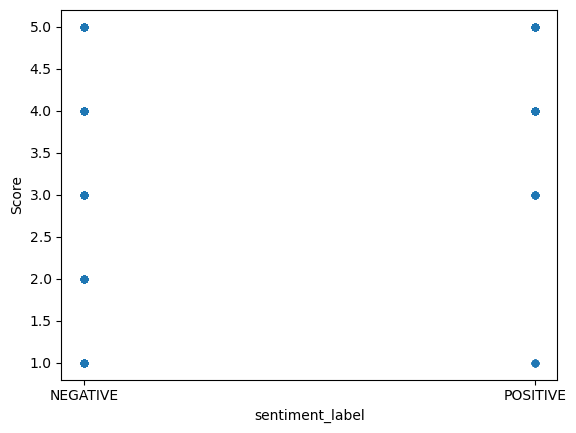

In [78]:
dog_food_df.plot.scatter(x='sentiment_label', y='Score')

In [72]:
dog_food_df['tokens'].iloc[1]

['genuine',
 'greenies',
 'product',
 'knockoff',
 'dog',
 'love',
 'favorite',
 'treat',
 'small',
 'dog',
 'lb',
 'teenie',
 'size',
 'perfect',
 'paid',
 'far',
 'best',
 'price',
 'found',
 'anywhere',
 'wish',
 'part',
 'subscribe',
 'save',
 'program']